In [60]:
!pip3 install networkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
def my_read_graph_mapped(fin):
    n = int(fin.readline())
    G = nk.Graph(n)
    d = {}
    id = 0
    
    while True:
        try:
            line = fin.readline()
            
        except:
            break

        line = line.split()
        if len(line) == 0:
            break

        x = int(line[0][:-1])
        id += 1

        arr = [int(y) for y in line[1:]]
        for y in arr:
            if (x < y):
                G.addEdge(x, y, addMissing = True)

    return G, id


def readaspath(path):
    with open(path, 'r') as fin:
        G, n = my_read_graph_mapped(fin)
    return [G, n]

# Betweenness centrality using networkit

{0: '462', 1: '57', 2: '152', 3: '13', 4: '1', 5: '32', 6: '32', 7: '0', 8: '59', 9: '1', 10: '1', 11: '0', 12: '0', 13: '48', 14: '0', 15: '0', 16: '0', 17: '0', 18: '0', 19: '34', 20: '0', 21: '0', 22: '0', 23: '19', 24: '2', 25: '4', 26: '0', 27: '24', 28: '2', 29: '3', 30: '15', 31: '146', 32: '153', 33: '321'}


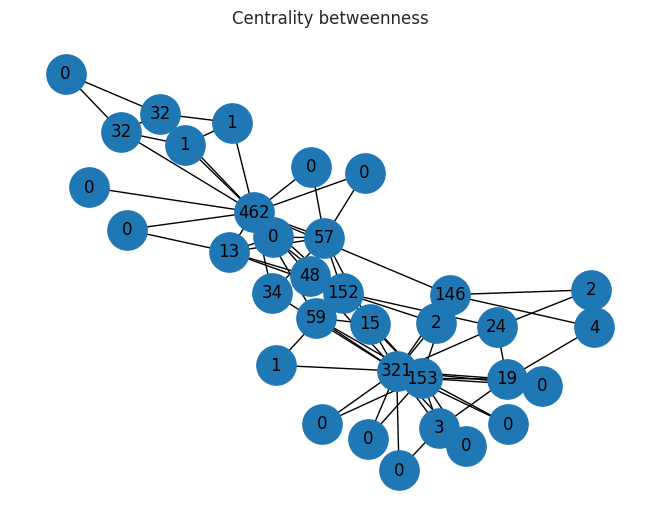

In [68]:
import matplotlib.pyplot as plt
import networkx as nx
import networkit as nk

G,n = readaspath("/content/data.txt")
cb = nk.centrality.Betweenness(G)
cb.run()
cb_data = cb.scores()
centrality_betweenness={}
for x in range(len(cb_data)):
  centrality_betweenness[x]=format(cb_data[x],".0f")

print(centrality_betweenness)
nk.viztasks.drawGraph(G,with_labels=True,labels=centrality_betweenness,node_size=800)
# plt.figure(figsize=(30,12)) 
plt.title("Centrality betweenness")
figsize=(30,12)



# Closeness Centrality using networkit

{0: '0.57', 2: '0.56', 33: '0.55', 31: '0.54', 8: '0.52', 13: '0.52', 32: '0.52', 19: '0.50', 1: '0.49', 3: '0.46', 27: '0.46', 30: '0.46', 28: '0.45', 7: '0.44', 9: '0.43', 23: '0.39', 5: '0.38', 6: '0.38', 29: '0.38', 4: '0.38', 10: '0.38', 17: '0.38', 21: '0.38', 24: '0.38', 25: '0.38', 12: '0.37', 14: '0.37', 15: '0.37', 18: '0.37', 20: '0.37', 22: '0.37', 11: '0.37', 26: '0.36', 16: '0.28'}


Text(0.5, 1.0, 'Cloesness centrality')

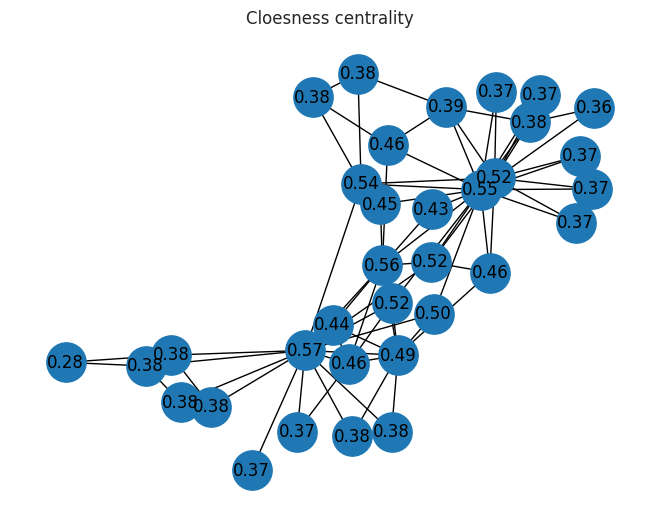

In [69]:
close = nk.centrality.Closeness(G, False, nk.centrality.ClosenessVariant.GENERALIZED)
close.run()
data =close.ranking()
closeness_centrality = {}
for x in data:
  closeness_centrality[x[0]]=format(x[1],".2f")
print(closeness_centrality)
nk.viztasks.drawGraph(G,with_labels=True,labels=closeness_centrality,node_size=800)
plt.title("Cloesness centrality")




# Clustering coefficient

In [64]:
def clustering_coefficient(adj_matrix):
    n = len(adj_matrix)
    cc = []
    for i in range(n):
        neighbors = [j for j in range(n) if adj_matrix[i][j]]
        k = len(neighbors)
        if k < 2:
            cc.append(0)
            continue
        num_edges = 0
        for j in range(k):
            for l in range(j+1, k):
                if adj_matrix[neighbors[j]][neighbors[l]]:
                    num_edges += 1
        cc.append(2*num_edges/(k*(k-1)))
    return cc

def average_clustering_coefficient(adj_matrix):
    cc = clustering_coefficient(adj_matrix)
    return sum(cc)/len(cc)


In [65]:
lcc = nk.centrality.LocalClusteringCoefficient(G)
# avg_lcc = nk.centrality.averageLocalClusteringCoefficient(G)

print("Local clustering coefficients:", lcc.run().scores())
avg = lcc.run().scores()
print("Average local clustering coefficient:", sum(avg)/len(avg))
# print("Average local clustering coefficient:", avg_lcc)

Local clustering coefficients: [0.15, 0.3333333333333333, 0.24444444444444444, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5, 1.0, 0.5, 0.0, 0.6666666666666666, 0.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.4, 0.3333333333333333, 0.3333333333333333, 1.0, 0.16666666666666666, 0.3333333333333333, 0.6666666666666666, 0.5, 0.2, 0.19696969696969696, 0.11029411764705882]
Average local clustering coefficient: 0.5706384782076823
